In [60]:
#load all required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection  import train_test_split 

#ML package and classes
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [4]:
#load data 
url ='https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
column =['sepal-length','sepal-width','petal-length','petal-width','class']
df = pd.read_csv(url,names=column)


In [10]:
#Univariate analysis
'''
how many columns?
is any missing value?
data type? : categorial (oridinal, binary, nominal) , numerical (descreet, measure)
get to know  top 5 and buttom 5 rows  or trend
'''
print(df.shape) # 5 columns
print(df.isnull()) 

print(df.isnull().sum()) 
print(df.isnull().count()) 

print(df.info()) 

print(df.describe()) 

(150, 5)
     sepal-length  sepal-width  petal-length  petal-width  class
0           False        False         False        False  False
1           False        False         False        False  False
2           False        False         False        False  False
3           False        False         False        False  False
4           False        False         False        False  False
..            ...          ...           ...          ...    ...
145         False        False         False        False  False
146         False        False         False        False  False
147         False        False         False        False  False
148         False        False         False        False  False
149         False        False         False        False  False

[150 rows x 5 columns]
sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64
sepal-length    150
sepal-width     150
petal-length    150
petal-width     150
clas

In [15]:
#Calssifiation 
print(df.groupby('class').count())
print(df.groupby('class').count()[['petal-length','sepal-width']])


print(df.groupby('class').size())


                 sepal-length  sepal-width  petal-length  petal-width
class                                                                
Iris-setosa                50           50            50           50
Iris-versicolor            50           50            50           50
Iris-virginica             50           50            50           50
                 petal-length  sepal-width
class                                     
Iris-setosa                50           50
Iris-versicolor            50           50
Iris-virginica             50           50
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


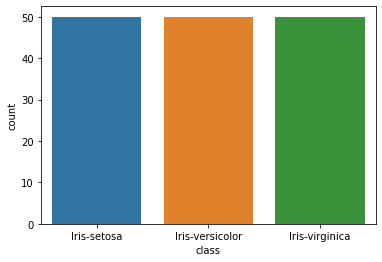

In [17]:
#Distribuation of data 
sns.countplot(x='class',data=df)
plt.show()

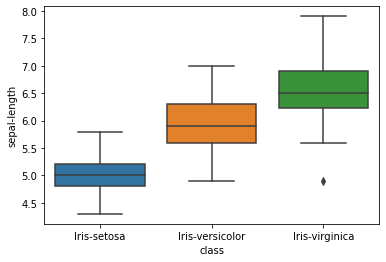

In [18]:
sns.boxplot(x='class',y='sepal-length',data=df)
plt.show()


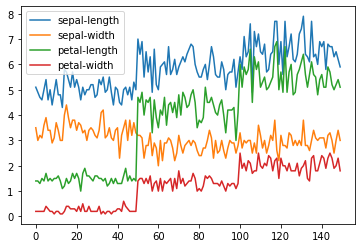

In [20]:
#EDA : Explorarity Data Analysis 
#Define the problem  : Hypothesis Analysis 
#Data acquistion     : 3 yrs, 5 yrs, 10 yrs
#Features selection 

df.plot() #line chart
plt.show() 



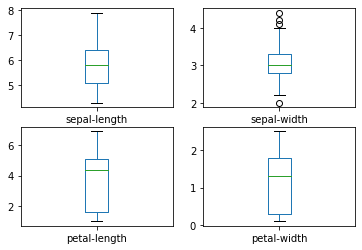

In [23]:
##boxplot
#df.plot(kind='box')
df.plot(kind='box',subplots=True, layout=(2,2))
plt.show()

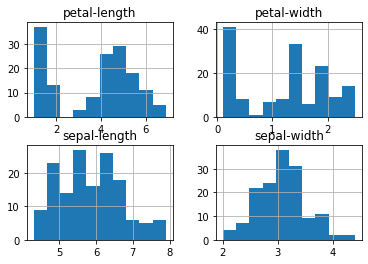

In [24]:
#data continiouty
#hist
df.hist()
plt.show()

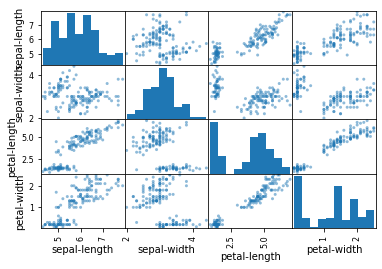

In [27]:
#Multivariate plots
scatter_matrix(df)
plt.show()


In [33]:
#features extraction 
#print(df.head(10))

#(y)-response
#(x)-input 
data = df.values #convert dataframe to array 
print(type(data))

'''
0 1 2 3 4
a b c d e
1 2 4 4 6
1 2 4 4 6
1 2 4 4 6
1 2 4 4 6
1 2 4 4 6

[,]

[row index , col index]
[:,:]  #: all rows , : all columns

a =[11,3,5,777]
a
a[:]
a[-1]
a[::-1]
'''
x = data[:,0:4] #get all rows and first four features(numerical column) 
y = data[:,4] #get all rows and 5th column (class or categorial) data

print(x.shape)
print(y.shape)


<class 'numpy.ndarray'>
(150, 4)
(150,)


In [36]:
#split data 
x_train, x_valiation, y_train, y_validation= train_test_split(x,y,test_size=.20,random_state=2) 

print(x_train.shape)
print(x_valiation.shape)
print(y_train.shape)
print(y_validation.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [62]:
#Evaluate Algo 
#LR -> Logistic Regression 
#LDA -> Linear Discremental Analysis
#KNN ->  K-Nearest Neighors
#CART -> Classification and Regression Trees
#NB -> Naive Byes
#SVM -> Support Vector Machines 

models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

print(models)

for name,model in models:
    #print(name,model)
    kfold = StratifiedKFold(n_splits=10,random_state=2,shuffle=True)
    result = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    print('%s %f %f  ' % (name,result.mean()*100, result.std()))
    
    


[('LR', LogisticRegression()), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('SVM', SVC())]


c:\users\vimlesh.kumar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vimlesh.kumar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

LR 97.500000 0.053359  
LDA 97.500000 0.038188  
KNN 95.833333 0.055902  
CART 95.833333 0.055902  
NB 95.000000 0.076376  
SVM 98.333333 0.033333  


c:\users\vimlesh.kumar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vimlesh.kumar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/